In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from scipy.misc import comb
import scipy as scp
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import sets
import random
import itertools
import os,sys,fnmatch
import timeit
import scipy.stats
import seaborn as sns
from IPython.core.display import display, HTML
from scipy.stats import chisquare
sns.set_style("white",{ 'legend.frameon': False})


/home/chenani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: the sets module is deprecated
/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]
clrs = ["#cb535a",
"#5ba952",
"#c97d3d",
"#9a993e"]

In [5]:
popDBList = [os.path.join(item[0],item[1])for item in locate('*popDB*.db','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
popDBList

['/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3839Control/dataFiles/sleepDB/3839-popDB-D5.db',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3661Control/dataFiles/sleepDB/3661-popDB-D1.db',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3661Control/dataFiles/sleepDB/3661-popDB-D3.db',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3661Control/dataFiles/sleepDB/3661-popDB-D2.db',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/sleepDB/3906-popDB-D4.db',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/sleepDB/3906-popDB-D2.db',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/sleepDB/3906-popDB-D1.db',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/sleepDB/390

In [100]:
preDB = pd.DataFrame([],columns=[u't_start', u't_end', u'peak value', u't_peak', u'epoch', u'date',u'session', u'animal', u'Lcorr', u'Rcorr'])
postDB = pd.DataFrame([],columns=[u't_start', u't_end', u'peak value', u't_peak', u'epoch', u'date',u'session', u'animal', u'Lcorr', u'Rcorr'])
for item in popDBList:
    if item.find('lesion')>0:
        print item
        popDB= pd.read_pickle(item)
        #popDB = popDB[popDB.epoch=='sws']
        if item.find('434')>0:
            preDB = preDB.append(popDB[popDB.session=='sleep05'],ignore_index=True)
            postDB = postDB.append(popDB[popDB.session=='sleep06'],ignore_index=True)
        else:
            preDB = preDB.append(popDB[popDB.session=='sleep01'],ignore_index=True)
            postDB = postDB.append(popDB[popDB.session=='sleep02'],ignore_index=True)

/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/sleepDB/434-popDB-D1.db
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/sleepDB/3838-popDB-D1.db
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/sleepDB/3838-popDB-D4.db
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/sleepDB/3838-popDB-D2.db
/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/sleepDB/3656-popDB-D1.db


In [101]:
corrBins = np.arange(-1.05,1.04,0.09)

In [102]:
crr92 = pkl.load(open('corr9.crr2','rb'))

In [103]:
corrMaxPre = []
Lnan = np.isnan(preDB.Lcorr)
Rnan = np.isnan(preDB.Rcorr)
ValidIdx = preDB.index[np.logical_not(np.logical_and(Lnan,Rnan))]
for idx in ValidIdx:
    if np.isnan(preDB.Lcorr[idx]):
        corrMaxPre.append(preDB.Rcorr[idx])
    elif np.isnan(preDB.Rcorr[idx]):
        corrMaxPre.append(preDB.Lcorr[idx])
    else:
        LRc = np.argmax([np.abs(preDB.Rcorr[idx]),np.abs(preDB.Lcorr[idx])])
        if LRc:
            corrMaxPre.append(preDB.Lcorr[idx])
        else:
            corrMaxPre.append(preDB.Rcorr[idx])
###############################################################################
corrMaxPost = []
Lnan = np.isnan(postDB.Lcorr)
Rnan = np.isnan(postDB.Rcorr)
ValidIdx = postDB.index[np.logical_not(np.logical_and(Lnan,Rnan))]
for idx in ValidIdx:
    if np.isnan(postDB.Lcorr[idx]):
        corrMaxPost.append(postDB.Rcorr[idx])
    elif np.isnan(postDB.Rcorr[idx]):
        corrMaxPost.append(postDB.Lcorr[idx])
    else:
        LRc = np.argmax([np.abs(postDB.Rcorr[idx]),np.abs(postDB.Lcorr[idx])])
        if LRc:
            corrMaxPost.append(postDB.Lcorr[idx])
        else:
            corrMaxPost.append(postDB.Rcorr[idx])
################################################################################

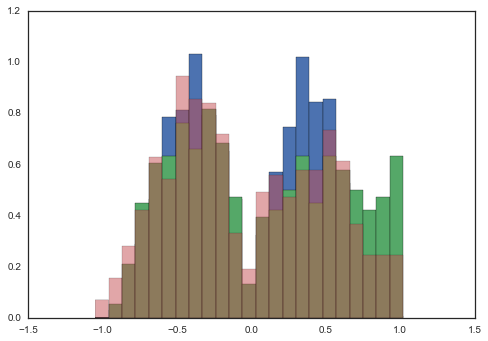

In [104]:
hstSorr = pl.hist(crr92,corrBins,normed=True)
hstPre = pl.hist(corrMaxPre,corrBins,normed=True)
hstPost = pl.hist(corrMaxPost,corrBins,normed=True,alpha=0.5)
cumhstSorr = np.cumsum(hstSorr[0])
cumhstPre = np.cumsum(hstPre[0])
cumhstPost = np.cumsum(hstPost[0])

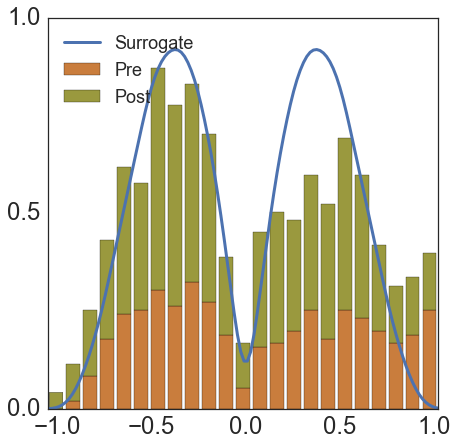

In [63]:
f,ax = pl.subplots(1,1,figsize=[7,7])
sns.kdeplot(crr92,linewidth=3,label='Surrogate')
n, bins, patches = pl.hist([corrMaxPre,corrMaxPost],corrBins, normed=1,histtype='bar',
                           stacked=True,fill=True,
                           label=['Pre','Post'],
                           color = [clrs[2],clrs[3]])
pl.legend(loc=2,fontsize=18)
pl.yticks([0,0.5,1],fontsize=24)
pl.xticks([-1,-0.5,0,0.5,1],fontsize=24)
pl.xlim(-1.05,1.02);


In [64]:
f.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/lesion-sleep.svg',transparent=True)
f.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/lesion-sleep.pdf',transparent=True)
f.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/lesion-sleep.eps',transparent=True)

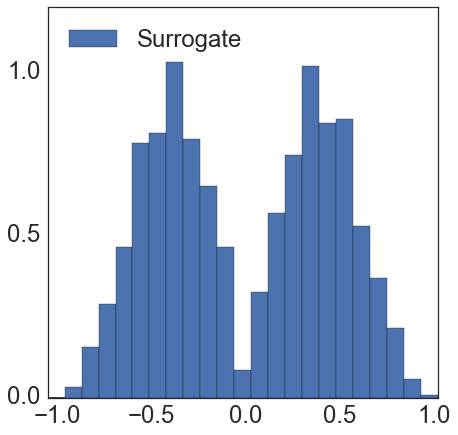

In [65]:
f2,ax = pl.subplots(1,1,figsize=[7,7])
n, bins, patches = pl.hist(crr92,corrBins, normed=1,histtype='bar',
                           stacked=True,fill=True,
                           label=['Surrogate'])
pl.legend(loc=2,fontsize=24)
pl.yticks([0,0.5,1],fontsize=24)
pl.xticks([-1,-0.5,0,0.5,1],fontsize=24)
pl.xlim(-1.05,1.02);
f2.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/Surrogate.svg',transparent=True)
f2.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/Surrogate.pdf',transparent=True)
f2.savefig('/home/chenani/ownCloud/Plots/SFN-poster/RO-plots/Surrogate.eps',transparent=True)

[]

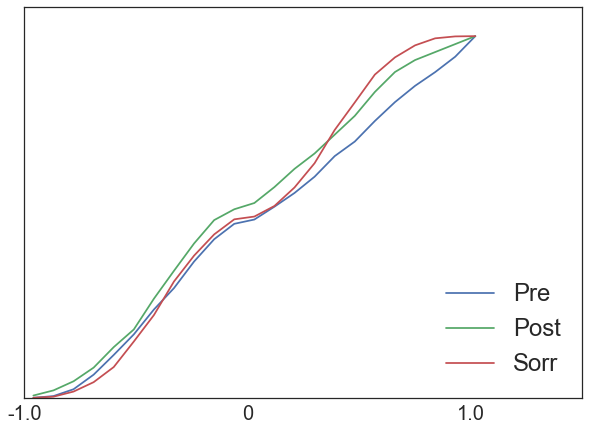

In [66]:
f,ax = pl.subplots(1,1,figsize=[10,7],sharey=False)
ax.plot(hstPre[1][1:],cumhstPre,label = 'Pre')
ax.plot(hstPre[1][1:],cumhstPost,label = 'Post')
ax.plot(hstPre[1][1:],cumhstSorr,label = 'Sorr')
#ax.plot(bins[1:],bcdf,label='Cnt')
#ax.plot(bins[1:],ccdf,label ='Lsn')
ax.legend(loc=4,fontsize=24)
ax.set_xticks([-1.0,0,1.0])
ax.set_xticklabels([-1.0,0,1.0],fontsize=20)
ax.set_yticks([])


In [67]:
SorrProbs = hstSorr[0]*0.09
PreProbs = hstPre[0]*0.09
PostProbs = hstPost[0]*0.09

In [15]:
pl.plot(corrBins[:-1],SorrProbs,c='k',lw=2,label='Sorr')
pl.plot(corrBins[:-1],PreProbs,c=clrs[2],label='Pre')
pl.plot(corrBins[:-1],PostProbs,c=clrs[3],label ='Post')
pl.xlabel('lesion-rem',fontsize=22)
pl.legend()

NameError: name 'SorrProbs' is not defined

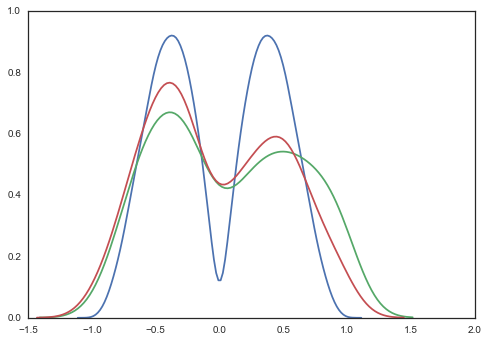

In [16]:
sns.kdeplot(crr92)
sns.kdeplot(np.array(corrMaxPre))
sns.kdeplot(np.array(corrMaxPost))

Power_divergenceResult(statistic=149513.7306873636, pvalue=0.0)

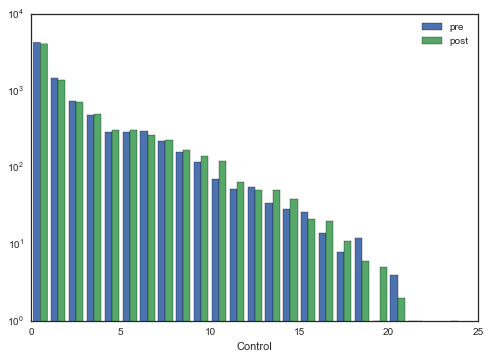

In [17]:
rateBins = (np.arange(0,25,1))
preRate  = 1e3/np.diff(preDB.t_peak)
postRate = 1e3/np.diff(postDB.t_peak)           
pl.hist([preRate,postRate],rateBins,label=['pre','post'],log=True);
pl.legend()
pl.xlabel('Control')
chisquare(preRate[:8454],postRate[:])

In [18]:
corrMaxPost = np.array(corrMaxPost)
corrMaxPre = np.array(corrMaxPre)

In [19]:
Lnan = np.isnan(postDB.Lcorr)
Rnan = np.isnan(postDB.Rcorr)
nanIdx = np.logical_and(Lnan,Rnan)

In [20]:
postDB[np.logical_not(nanIdx)]

,t_start,t_end,peak value,t_peak,epoch,date,session,animal,Lcorr,Rcorr
0,23599777.615105,23599908.615105,16.971934,23599807.615105,NA,Day1,sleep06,Rat434Lesion,-0.266173,-0.360469
1,23600101.615105,23600198.615105,10.281620,23600126.615105,NA,Day1,sleep06,Rat434Lesion,-0.750318,0.630769
2,23600251.615105,23600452.615105,16.280840,23600324.615105,NA,Day1,sleep06,Rat434Lesion,-0.434424,0.127378
3,23600521.615105,23601250.615105,18.776798,23600638.615105,NA,Day1,sleep06,Rat434Lesion,0.030865,-0.316875
4,23601282.615105,23601344.615105,9.511616,23601309.615105,NA,Day1,sleep06,Rat434Lesion,-0.910420,-0.853982
5,23601404.615105,23601452.615105,7.485433,23601429.615105,NA,Day1,sleep06,Rat434Lesion,-0.281865,-0.356250
6,23601525.615105,23601638.615105,10.696311,23601564.615105,NA,Day1,sleep06,Rat434Lesion,-0.392571,-0.493135
7,23601694.615105,23601782.615105,7.449954,23601719.615105,NA,Day1,sleep06,Rat434Lesion,-0.498150,-0.677152
8,23601935.615105,23602022.615105,11.795142,23601973.615105,NA,Day1,sleep06,Rat434Lesion,-0.194631,0.055026
9,23602249.615105,23602353.615105,9.262929,23602320.615105,NA,Day1,sleep06,Rat434Lesion,-0.716667,-0.318505


In [105]:
nSigP  = np.histogram(corrMaxPre,corrBins)[0][20:].sum()
nSigN  = np.histogram(corrMaxPre,corrBins)[0][:3].sum()
Nreac = np.histogram(corrMaxPre,corrBins)[0].sum()
print 100.0*nSigP/Nreac,100.0*nSigN/Nreac

13.7440758294 2.36966824645


In [106]:
corrMaxPre = np.array(corrMaxPre)
nSigP1  = (corrMaxPre>0.75).sum()
nSigN1  = (corrMaxPre<-0.75).sum()
Nreac1 = corrMaxPre.size
print 100.0*nSigP1/Nreac1,100.0*nSigN1/Nreac1
corrMaxPost = np.array(corrMaxPost)
nSigP2  = (corrMaxPost>0.75).sum()
nSigN2  = (corrMaxPost<-0.75).sum()
Nreac2 = corrMaxPost.size
print 100.0*nSigP2/Nreac2,100.0*nSigN2/Nreac2

13.7440758294 3.31753554502
6.61417322835 5.35433070866


In [22]:
prePsigIdx = np.union1d(preDB[preDB.Lcorr>0.7].index,preDB[preDB.Rcorr>0.7].index)
preNsigIdx = np.union1d(preDB[preDB.Lcorr<-0.7].index,preDB[preDB.Rcorr<-0.7].index)
postPsigIdx = np.union1d(postDB[postDB.Lcorr>0.7].index,postDB[postDB.Rcorr>0.7].index)
postNsigIdx = np.union1d(postDB[postDB.Lcorr<-0.7].index,postDB[postDB.Rcorr<-0.7].index)

In [42]:
1e2*prePsigIdx.size/len(corrMaxPre)

16.824644549763033

In [23]:
(1e3/np.diff(preDB.t_peak[prePsigIdx])).mean(),(1e3/np.diff(preDB.t_peak[preNsigIdx])).mean()

(0.41809523824084416, 0.38196593479859919)

In [24]:
(1e3/np.diff(postDB.t_peak[postPsigIdx])).mean(),(1e3/np.diff(postDB.t_peak[postNsigIdx])).mean()

(0.54031296954231711, 0.15627139781708066)

In [25]:
(1e3/np.diff(preDB.t_peak)).mean(),(1e3/np.diff(postDB.t_peak)).mean()

(2.3843398533554225, 2.5353280670840128)

In [26]:
chisquare(hstPre[0][10:14],hstPost[0][10:14])

Power_divergenceResult(statistic=0.13218065698995396, pvalue=0.98771389474081839)

In [27]:
chisquare(hstPre[0][19:],hstPost[0][19:])

Power_divergenceResult(statistic=1.0000889656168668, pvalue=0.80123042982644443)

In [28]:
chisquare(hstPre[0][:5],hstPost[0][:5])

Power_divergenceResult(statistic=0.15969102609425437, pvalue=0.99697705271660109)

In [29]:
LprePos = hstPre[0][19:]
LposPos = hstPost[0][19:]
LpreNeg = hstPre[0][:5]
LposNeg = hstPre[0][:5]

In [30]:
print chisquare(hstPre[0][19:],LprePos)
print chisquare(hstPost[0][19:],LposPos)

Power_divergenceResult(statistic=0.0, pvalue=1.0)
Power_divergenceResult(statistic=0.0, pvalue=1.0)


In [31]:
print chisquare(hstPre[0][:5],LpreNeg)
print chisquare(hstPost[0][:5],LposNeg)

Power_divergenceResult(statistic=nan, pvalue=nan)
Power_divergenceResult(statistic=inf, pvalue=nan)
